# Load Image Dataset

In [4]:
import tensorflow as tf
from tensorflow                   import keras
from tensorflow.keras.layers      import Input, BatchNormalization, Activation, Dense, Dropout, Conv2D, Conv2DTranspose
from tensorflow.keras.layers      import Input, MaxPooling2D, concatenate
from tensorflow.keras.models      import Model
from tensorflow.keras.models      import Sequential
from tensorflow.keras             import backend as K
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks   import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import random
import sys
import numpy as np
import math  as math 
import matplotlib.pyplot as plt
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
import skimage.measure 

# Funciones Locales
#######################################################
# Reescalar un Array (Devuelve un Array Entero)
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom
#######################################################

# Load Model and Image collection (Change for testing)

filepath="/content/drive/My Drive/speckle_data/modelo_10000_weights.best.hdf5"
phase_clean  = np.load('/content/drive/My Drive/speckle_data/phaseBank_128_test_100.npy')

model = tf.keras.models.load_model(filepath)

# Cargamos la coleccion de imagenes de TEST
i = 128           # Tamano Imagen
sample =  100    # Tamano Muestra

image_clean  = [] # Salida con interferograma limpio, TRUE GROUND
image_noise  = [] # Salida con interferograma sucio

I1 = 1
I2 = 1


image_clean  = ( I1 + I2 + 2 * np.sqrt(I1*I2) * np.cos(2 * np.pi * phase_clean))
image_noise  = [] # Salida con interferograma sucio
for y in tqdm(range(sample)):
  image_noise.append(image_clean[y] + np.random.normal(0,np.random.random() * 1.75 + 3.75 ,(i,i)))
# Reescalamos para tener una pseudoimagen en 255 niveles de Gris
for y in tqdm(range(sample)):
  image_noise[y] = scale(image_noise[y].astype('float32'),0,255)
  image_clean[y] = scale(image_clean[y].astype('float32'),0,255)


x_train     = []
y_train     = []
input_shape = (128,128,1)
x_train = np.reshape(np.array(image_clean) / 255.0, (sample,128,128,1))
y_train = np.reshape(np.array(image_noise) / 255.0, (sample,128,128,1))

z = model.predict(y_train).astype('float32');

100%|██████████| 100/100 [00:00<00:00, 2831.18it/s]


# Show Cleaned Images - Randomly sampled from the dataset

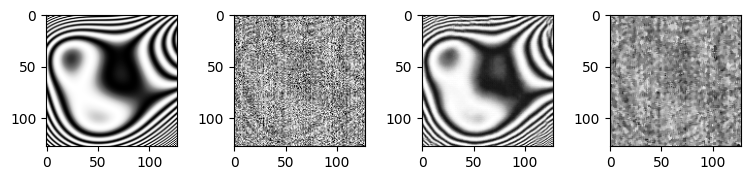




SSMI: 0.12114
SSMI: 0.82802
SSMI: 0.12326



82


In [7]:
# Test with sample Images
import cv2
i = random.randrange(1,sample)
fig = plt.figure(figsize=(16, 8), dpi=100);
fig.add_subplot(4,4,1)
plt.imshow(image_clean[i],cmap='Greys');
fig.add_subplot(4,4,2)
plt.imshow(y_train[i,:,:,0],cmap='Greys');
fig.add_subplot(4,4,3)
plt.imshow(z[i,:,:,0],cmap='Greys');
plt.subplots_adjust(left=0.05, right=0.5)
fig.add_subplot(4,4,4)
plt.imshow(cv2.medianBlur(y_train[i,:,:,0],3),cmap='Greys');
plt.subplots_adjust(left=0.05, right=0.5)
plt.show();
print('\n\n')
print("SSMI: "+"{:.5f}".format(skimage.metrics.structural_similarity(scale(image_clean[i].astype('float32'),0,255),scale(y_train[i,:,:,0].astype('float32'),0,255))));
print("SSMI: "+"{:.5f}".format(skimage.metrics.structural_similarity(scale(image_clean[i].astype('float32'),0,255),scale(z[i,:,:,0].astype('float32'),0,255))));
print("SSMI: "+"{:.5f}".format(skimage.metrics.structural_similarity(scale(image_clean[i].astype('float32'),0,255),cv2.medianBlur(scale(y_train[i,:,:,0].astype('float32'),0,255),3))));
print('\n\n')
print(i)